Our task is to classify the reviews to Positive or Negative based on the text analysis, then a Recommendation score need to be calculated for each drug for recommending the best effective drug. <br><br>Hence it is a Binary Classification problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler
import joblib


In [2]:
data = pd.read_csv("../csv/final_data.csv")
print(data.shape)
data.head()

(212690, 58)


,uniqueID,drugName,condition,review,rating,date,usefulCount,review_sentiment,cleaned_review,sentiment_score,...,10,11,12,13,14,15,16,17,18,19
0,206461,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1,no side effect take combin bystol mg fish oil,-0.2960,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
1,95260,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1,son halfway fourth week intuniv becam concern ...,0.8603,...,0.000154,0.000154,0.000154,0.000154,0.000154,0.036646,0.000154,0.000154,0.000154,0.000154
2,92703,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,0,use take anoth oral contracept pill cycl happi...,0.7962,...,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.014679,0.000143
3,138000,ortho evra,birth control,"""This is my first time using any form of birth...",8,2015-11-03,10,1,first time use form birth control glad went pa...,0.7184,...,0.000250,0.000250,0.000250,0.000250,0.000250,0.000250,0.027342,0.000250,0.000250,0.000250
4,35696,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1,suboxon complet turn life around feel healthie...,0.9403,...,0.000172,0.000172,0.000172,0.000172,0.023106,0.000172,0.000172,0.000172,0.000172,0.000172


Review_sentiment is labels - Y<br>
All other columns are features - X, (only categorical col is 'condition' and 'year')

In [3]:
X = data.drop(['uniqueID','rating','date','review','review_sentiment'],axis=1)
X

,drugName,condition,usefulCount,cleaned_review,sentiment_score,sentiment_score_clean,year,word_count,unique_word_count,char_length,...,10,11,12,13,14,15,16,17,18,19
0,valsartan,left ventricular dysfunction,27,no side effect take combin bystol mg fish oil,-0.2960,-0.2960,2012,9,9,46,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
1,guanfacine,adhd,192,son halfway fourth week intuniv becam concern ...,0.8603,0.6929,2010,65,54,372,...,0.000154,0.000154,0.000154,0.000154,0.000154,0.036646,0.000154,0.000154,0.000154,0.000154
2,lybrel,birth control,17,use take anoth oral contracept pill cycl happi...,0.7962,0.2732,2009,70,49,403,...,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.014679,0.000143
3,ortho evra,birth control,10,first time use form birth control glad went pa...,0.7184,0.1027,2015,39,26,226,...,0.000250,0.000250,0.000250,0.000250,0.000250,0.000250,0.027342,0.000250,0.000250,0.000250
4,buprenorphine / naloxone,opiate dependence,37,suboxon complet turn life around feel healthie...,0.9403,0.8934,2016,59,52,381,...,0.000172,0.000172,0.000172,0.000172,0.023106,0.000172,0.000172,0.000172,0.000172,0.000172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212685,tamoxifen,"breast cancer, prevention",43,taken tamoxifen year side effect sever sweat d...,-0.8924,-0.8750,2014,50,41,315,...,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.100712,0.000204,0.000204
212686,escitalopram,anxiety,11,take lexapro escitaploprgram sinc februari fir...,0.9223,0.7845,2016,70,51,434,...,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.307202,0.000145,0.000145
212687,levonorgestrel,birth control,7,marri year old no kid take pill hassl decid ge...,-0.9589,-0.9501,2010,69,52,377,...,0.000145,0.000145,0.000145,0.000145,0.022366,0.000145,0.000145,0.000145,0.000145,0.000145
212688,tapentadol,pain,20,prescrib nucynta sever neck shoulder pain take...,-0.9260,-0.8519,2011,18,16,108,...,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.123558,0.000526


In [4]:
data_cols = X.columns
data_cols

Index(['drugName', 'condition', 'usefulCount', 'cleaned_review',
       'sentiment_score', 'sentiment_score_clean', 'year', 'word_count',
       'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'subj_count', 'obj_count',
       'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC',
       'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT',
       'QUANTITY', 'TIME', 'WORK_OF_ART', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19'],
      dtype='object')

In [5]:
y = data["review_sentiment"].values
y.shape

(212690,)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.30,random_state=42)


In [7]:
print("length of train set",X_train.shape,y_train.shape)
print("length of val set",X_cv.shape,y_cv.shape)
print("length of test set",X_test.shape,y_test.shape)

length of train set (104218, 53) (104218,)
length of val set (44665, 53) (44665,)
length of test set (63807, 53) (63807,)


### Encoding Categorical Varibles like Conditions

In [8]:
# from sklearn.preprocessing import LabelEncoder

# lab_enc_cond = LabelEncoder()

# lab_enc_cond.fit(X['condition'].values)

# X_train_condition = lab_enc_cond.transform(X_train['condition'].values).reshape(-1,1)
# X_test_condition = lab_enc_cond.transform(X_test['condition'].values).reshape(-1,1)
# X_cv_condition = lab_enc_cond.transform(X_cv['condition'].values).reshape(-1,1)

# print('After Encoding')
# print('Train data shape',X_train_condition.shape)
# print('Test data shape',X_test_condition.shape)
# print('CV data shape',X_cv_condition.shape)

In [9]:
# import joblib
# print('Saving condition encoder..')
# joblib.dump(lab_enc_cond,'../models/condition_encoder.pkl')

In [10]:
lab_enc_cond = joblib.load('../models/condition_encoder.pkl')

X_train_condition = lab_enc_cond.transform(X_train['condition'].values).reshape(-1,1)
X_test_condition = lab_enc_cond.transform(X_test['condition'].values).reshape(-1,1)
X_cv_condition = lab_enc_cond.transform(X_cv['condition'].values).reshape(-1,1)

print('After Encoding')
print('Train data shape',X_train_condition.shape)
print('Test data shape',X_test_condition.shape)
print('CV data shape',X_cv_condition.shape)

After Encoding
Train data shape (104218, 1)
Test data shape (63807, 1)
CV data shape (44665, 1)


In [11]:
# lab_enc_year = LabelEncoder()

# lab_enc_year.fit(X['year'].values)

# X_train_year = lab_enc_year.transform(X_train['year'].values).reshape(-1,1)
# X_test_year = lab_enc_year.transform(X_test['year'].values).reshape(-1,1)
# X_cv_year = lab_enc_year.transform(X_cv['year'].values).reshape(-1,1)

# print('After Encoding')
# print('Train data shape',X_train_year.shape)
# print('Test data shape',X_test_year.shape)
# print('CV data shape',X_cv_year.shape)

# print('Saving year encoder..')
# joblib.dump(lab_enc_year,'../models/year_encoder.pkl')

In [12]:
lab_enc_year = joblib.load("../models/year_encoder.pkl")

X_train_year = lab_enc_year.transform(X_train['year'].values).reshape(-1,1)
X_test_year = lab_enc_year.transform(X_test['year'].values).reshape(-1,1)
X_cv_year = lab_enc_year.transform(X_cv['year'].values).reshape(-1,1)

print('After Encoding')
print('Train data shape',X_train_year.shape)
print('Test data shape',X_test_year.shape)
print('CV data shape',X_cv_year.shape)

After Encoding
Train data shape (104218, 1)
Test data shape (63807, 1)
CV data shape (44665, 1)


### Encoding Reviews as BoW & TF-IDF

#### BoW

Learn a vocabulary dictionary of all tokens in the raw documents.<br>
Transform documents to document-term matrix.<br>
Extract token counts out of raw text documents using the vocabulary fitted with fit or the one provided to the constructor.

In [15]:
# vect_bow_1 = CountVectorizer(min_df=10,ngram_range=(1,1))

# vect_bow_1.fit(X_train['cleaned_review'].values) # fitted on train data only

# X_train_review_bow_1 = vect_bow_1.transform(X_train['cleaned_review'].values)
# X_test_review_bow_1 = vect_bow_1.transform(X_test['cleaned_review'].values)
# X_cv_review_bow_1 = vect_bow_1.transform(X_cv['cleaned_review'].values)

# print('After Vectorization')
# print('Train data shape:',X_train_review_bow_1.shape)
# print('Test data shape:',X_test_review_bow_1.shape)
# print('CV data shape:',X_cv_review_bow_1.shape)

# print('Vectorizer for BoW is saved..')
# joblib.dump(vect_bow_1,'../models/vectorizer_bow.pkl')

In [16]:
vect_bow_1 = joblib.load('../models/vectorizer_bow.pkl')

X_train_review_bow_1 = vect_bow_1.transform(X_train['cleaned_review'].values)
X_test_review_bow_1 = vect_bow_1.transform(X_test['cleaned_review'].values)
X_cv_review_bow_1 = vect_bow_1.transform(X_cv['cleaned_review'].values)

print('After Vectorization')
print('Train data shape:',X_train_review_bow_1.shape)
print('Test data shape:',X_test_review_bow_1.shape)
print('CV data shape:',X_cv_review_bow_1.shape)

After Vectorization
Train data shape: (104218, 7327)
Test data shape: (63807, 7327)
CV data shape: (44665, 7327)


In [17]:
X_train_review_bow_1

<104218x7327 sparse matrix of type '<class 'numpy.int64'>'
	with 3562797 stored elements in Compressed Sparse Row format>

#### TFI-DF

In [18]:
# vect_tfidf_1 = TfidfVectorizer(min_df=10,ngram_range=(1,1))

# vect_tfidf_1.fit(X_train['cleaned_review'].values) # fitted on train data only

# X_train_review_tfidf_1 = vect_tfidf_1.transform(X_train['cleaned_review'].values)
# X_test_review_tfidf_1 = vect_tfidf_1.transform(X_test['cleaned_review'].values)
# X_cv_review_tfidf_1 = vect_tfidf_1.transform(X_cv['cleaned_review'].values)

# print('After Vectorization')
# print('Train data shape:',X_train_review_tfidf_1.shape)
# print('Test data shape:',X_test_review_tfidf_1.shape)
# print('CV data shape:',X_cv_review_tfidf_1.shape)

# print('Vectorizer for TF-IDF is saved..')
# joblib.dump(vect_tfidf_1,'../models/vectorizer_tfidf.pkl')

In [19]:
vect_tfidf_1 = joblib.load('../models/vectorizer_tfidf.pkl')


X_train_review_tfidf_1 = vect_tfidf_1.transform(X_train['cleaned_review'].values)
X_test_review_tfidf_1 = vect_tfidf_1.transform(X_test['cleaned_review'].values)
X_cv_review_tfidf_1 = vect_tfidf_1.transform(X_cv['cleaned_review'].values)

print('After Vectorization')
print('Train data shape:',X_train_review_tfidf_1.shape)
print('Test data shape:',X_test_review_tfidf_1.shape)
print('CV data shape:',X_cv_review_tfidf_1.shape)

After Vectorization
Train data shape: (104218, 7327)
Test data shape: (63807, 7327)
CV data shape: (44665, 7327)


### Numerical columns to be Normalized

In [20]:
# numerical cols
columns = ['usefulCount','word_count','unique_word_count','char_length','count_punctuations','stopword_count',
               'mean_word_len','subj_count','obj_count','CARDINAL','DATE','EVENT','FAC','GPE','LANGUAGE','LAW',
            'LOC','MONEY','NORP','ORDINAL','ORG', 'PERCENT','PERSON', 'PRODUCT','QUANTITY','TIME','WORK_OF_ART',
           '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
print(len(columns))

47


### All numerical data in X_train_num_1

In [21]:
normalizer = Normalizer()

X_train_num_1 = normalizer.fit_transform(X_train[columns])
X_test_num_1 = normalizer.fit_transform(X_test[columns])
X_cv_num_1 = normalizer.fit_transform(X_cv[columns])

print("After vectorizations")
print(X_train_num_1.shape, y_train.shape)
print(X_test_num_1.shape, y_test.shape)
print(X_cv_num_1.shape, y_cv.shape)

After vectorizations
(104218, 47) (104218,)
(63807, 47) (63807,)
(44665, 47) (44665,)


### All sentiment data

In [22]:
X_train_sent_score = X_train[['sentiment_score','sentiment_score_clean']].values
X_test_sent_score = X_test[['sentiment_score','sentiment_score_clean']].values
X_cv_sent_score = X_cv[['sentiment_score','sentiment_score_clean']].values

print("After vectorizations")
print(X_train_sent_score.shape, y_train.shape)
print(X_test_sent_score.shape, y_test.shape)
print(X_cv_sent_score.shape, y_cv.shape)

After vectorizations
(104218, 2) (104218,)
(63807, 2) (63807,)
(44665, 2) (44665,)


## Sets with different Models and data
<li>Set I   -> All Extracted Features + Sentiment scores
<li>Set II  -> All Extracted Features + Sentiment scores + Reviews Bow (uni-gram) vectors
<li>Set III -> All Extracted Features + Sentiment Scores + Reviews TF-IDF (uni-gram) vectors

### Set I -> All Extracted Features + Sentiment scores

In [23]:
#concatenating all encoded features for set 1, to try out diff classifier models and select the model which performs well.
# from scipy.sparse import hstack

X_tr_1 = np.concatenate((X_train_num_1,X_train_sent_score),axis=1)

X_te_1 = np.concatenate((X_test_num_1,X_test_sent_score),axis=1)

X_cv_1 = np.concatenate((X_cv_num_1,X_cv_sent_score),axis=1)

print("Final Data matrix")
print(X_tr_1.shape, y_train.shape)
print(X_te_1.shape, y_test.shape)
print(X_cv_1.shape, y_cv.shape)

Final Data matrix
(104218, 49) (104218,)
(63807, 49) (63807,)
(44665, 49) (44665,)


# Model Building n Selection
Building and testing many classifier models!
<li>Random Model
<li>KNeighborsClassifier
<li>Logistic Regression
<li>Linear Support Vector Classification
<li>RandomForestClassifier
<li>XGBClassifier
<br><br>  The model wwhich works best will be tried for all sets!

In [24]:
from sklearn.metrics import log_loss, accuracy_score,confusion_matrix, f1_score,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [25]:
def model_metrics(clf,train_data,test_data,cv_data):
    
    print('**LogLoss**')
    predict_y = clf.predict_proba(train_data)
    print ("The train log loss is:",log_loss(y_train, predict_y))
    predict_y = clf.predict_proba(cv_data)
    print( "The cross validation log loss is:",log_loss(y_cv, predict_y))
    predict_y = clf.predict_proba(test_data)
    print( "The test log loss is:",log_loss(y_test, predict_y))

    print(50*'-')
    
    print('**Accuracy**')
    y_pred_tr = clf.predict(train_data)
    print ("The train Accuracy is:",accuracy_score(y_train, y_pred_tr))
    y_pred_cv = clf.predict(cv_data)
    print( "The cross validation Accuracy is:",accuracy_score(y_cv, y_pred_cv))
    y_pred_te = clf.predict(test_data)
    print( "The test Accuracy is:",accuracy_score(y_test, y_pred_te))

    print(50*'-')

     
    print('**F1 Score**')    
    print ("The train F1 score is:",f1_score(y_train, y_pred_tr))
    print( "The cross validation F1 score is:",f1_score(y_cv, y_pred_cv))
    print( "The test F1 score is:",f1_score(y_test, y_pred_te))

    print(50*'-')

#### Random

In [32]:
# test_len = len(y_test)
# y_pred = np.zeros((test_len,2))
# y_pred

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [33]:
# for i in range(test_len):
# 	prob = np.random.rand(1,2) 
# 	y_pred[i] = ((prob/sum(sum(prob)))[0])

In [34]:
# print("Log loss on Test Data using Random Model",log_loss(y_test, y_pred, eps=1e-15))

# y_pred =np.argmax(y_pred, axis=1)
# y_pred


Log loss on Test Data using Random Model 0.8868131311993609


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
# print("Accuray on Test Data using Random Model",accuracy_score(y_test, y_pred))
# print("F1 score on Test Data using Random Model",f1_score(y_test, y_pred))
# print("AUC on Test Data using Random Model",roc_auc_score(y_test, y_pred))

Accuray on Test Data using Random Model 0.500572037550739
F1 score on Test Data using Random Model 0.5845078686258915
AUC on Test Data using Random Model 0.5003550976004654


#### KNN

In [36]:

# param ={'n_neighbors': [x for x in range(1, 15, 2)]}
# k_cfl = KNeighborsClassifier()
# # hyperparameter tuning for {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]} 
# random_kcfl = RandomizedSearchCV(k_cfl,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
# random_kcfl.fit(X_tr_1,y_train)
# # the best param which fits
# print(random_kcfl.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'n_neighbors': 13}


In [37]:

# k_cfl.fit(X_tr_1,y_train)
# sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
# sig_clf.fit(X_tr_1, y_train)

# model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

**LogLoss**
The train log loss is: 0.4578976751405334
The cross validation log loss is: 0.5377356491128621
The test log loss is: 0.5387291276222967
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7891151240668598
The cross validation Accuracy is: 0.7283331467592075
The test Accuracy is: 0.728650461548106
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.864789044332066
The cross validation F1 score is: 0.8261903397696672
The test F1 score is: 0.8269707387272146
--------------------------------------------------


#### Logistic Regression

In [38]:
# param = {'C':[10 ** x for x in range(-5, 4)]}

# logisticR=LogisticRegression(penalty='l2',class_weight='balanced')

# random_lr = RandomizedSearchCV(logisticR,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
# random_lr.fit(X_tr_1,y_train)

# print(random_lr.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'C': 1000}


In [39]:

# logisticR=LogisticRegression(C=100 ,penalty='l2',class_weight='balanced',n_jobs=-1)
# logisticR.fit(X_tr_1,y_train)

# sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
# sig_clf.fit(X_tr_1, y_train)

# model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

**LogLoss**
The train log loss is: 0.5360125016161743
The cross validation log loss is: 0.5347273137606452
The test log loss is: 0.5359762191698905
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7333186205837763
The cross validation Accuracy is: 0.7339975372215382
The test Accuracy is: 0.7332894510006739
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.8256191139470828
The cross validation F1 score is: 0.8255077912731865
The test F1 score is: 0.8254134351019738
--------------------------------------------------


#### Linear Support Vector Classification

In [40]:
# param= {'C':[0.001,1,10,100]}

# linSVC=LinearSVC(penalty='l2',loss='hinge')

# random_svc = RandomizedSearchCV(linSVC,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
# random_svc.fit(X_tr_1,y_train)

# print(random_svc.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'C': 0.001}


In [41]:
# linSVC=LinearSVC(C=0.001 ,penalty='l2',loss='hinge')
# linSVC.fit(X_tr_1,y_train)
# sig_clf = CalibratedClassifierCV(linSVC, method="sigmoid")
# sig_clf.fit(X_tr_1, y_train)

    
# model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

**LogLoss**
The train log loss is: 0.557382736611464
The cross validation log loss is: 0.5570901667192839
The test log loss is: 0.5569614949694862
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7171601834615902
The cross validation Accuracy is: 0.7158401432889286
The test Accuracy is: 0.7169746266083659
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.8232740789592015
The cross validation F1 score is: 0.8219965779361028
The test F1 score is: 0.8229735425877094
--------------------------------------------------


#### Random Forest Classifier

In [42]:
# param = {'n_estimators':[100,500,1000,2000,3000]}

# rf_clf =RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=8)

# random_rf = RandomizedSearchCV(rf_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
# random_rf.fit(X_tr_1,y_train)

# print(random_rf.best_params_)


KeyboardInterrupt: 

In [43]:
# rf_clf = RandomForestClassifier(n_estimators=3000 ,random_state=42,n_jobs=-1,max_depth=8)
# rf_clf.fit(X_tr_1,y_train)

RandomForestClassifier(max_depth=8, n_estimators=3000, n_jobs=-1,
                       random_state=42)

In [44]:
# sig_clf = CalibratedClassifierCV(rf_clf, method="sigmoid")
# sig_clf.fit(X_tr_1, y_train)

# model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

**LogLoss**
The train log loss is: 0.49400815698673944
The cross validation log loss is: 0.5105391034782328
The test log loss is: 0.5110214811699658
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7572492275806483
The cross validation Accuracy is: 0.7447889846636069
The test Accuracy is: 0.7439622611939128
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.8375655702444318
The cross validation F1 score is: 0.8290209842655507
The test F1 score is: 0.8285999055762472
--------------------------------------------------


#### XGBoost

In [45]:
# param = {'n_estimators':[100,500,1000,2000,3000]}
 
# x_clf = XGBClassifier(nthread=-1,eval_metric='logloss',objective='binary:logistic', random_state=0)

# random_xgb = RandomizedSearchCV(x_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
# random_xgb.fit(X_tr_1,y_train)

# print(random_xgb.best_params_)

{'n_estimators': 1000}


In [46]:
# eval_set = [(X_tr_1, y_train), (X_te_1, y_test)]
# eval_set

[(array([[ 7.12039329e-01,  1.13926293e-01,  9.96855061e-02, ...,
           1.58235048e-05,  6.98300000e-01,  7.43000000e-01],
         [ 1.42704611e-01,  1.67522805e-01,  1.61318256e-01, ...,
           2.39768267e-04,  6.36500000e-01,  6.24900000e-01],
         [ 1.57915445e-01,  1.54935909e-01,  1.28120078e-01, ...,
           5.95970746e-07, -1.83800000e-01, -7.35100000e-01],
         ...,
         [ 2.32979788e-03,  1.65415649e-01,  1.37458075e-01, ...,
           3.23711809e-07,  5.98400000e-01,  9.11800000e-01],
         [ 6.66322408e-03,  1.59917378e-01,  1.46590930e-01, ...,
           6.80042020e-07, -9.61200000e-01, -9.63300000e-01],
         [ 1.62239606e-01,  1.53700679e-01,  1.40892289e-01, ...,
           1.25587344e-06,  2.38200000e-01,  3.40000000e-01]]),
  array([0, 1, 1, ..., 0, 1, 1], dtype=int64)),
 (array([[ 2.49529561e-01,  1.66353041e-01,  1.66353041e-01, ...,
           1.82804580e-04,  8.52200000e-01,  8.02000000e-01],
         [ 4.83758108e-02,  1.68042290e-

In [47]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

# x_clf = XGBClassifier(n_estimators=1000,nthread=-1,eval_metric='logloss',objective='binary:logistic',random_state=0,max_depth=10)
# x_clf.fit(X_tr_1,y_train,eval_set=eval_set,verbose=0)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=3000,
              n_jobs=None, nthread=-1, num_parallel_tree=None, ...)

In [48]:
# sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
# sig_clf.fit(X_tr_1, y_train)

CalibratedClassifierCV(estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='logloss',
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=3000, n_jobs=None,
                                               nthread=-1,
                                               num_parallel_tree=None, ...))

**LogLoss**
The train log loss is: 0.17874686681873747
The cross validation log loss is: 0.4071700996926437
The test log loss is: 0.40493431765188054
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.9999808094570996
The cross validation Accuracy is: 0.8379715661032128
The test Accuracy is: 0.8403936872130017
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.9999863189865105
The cross validation F1 score is: 0.8892595369619439
The test F1 score is: 0.8910848733744011
--------------------------------------------------


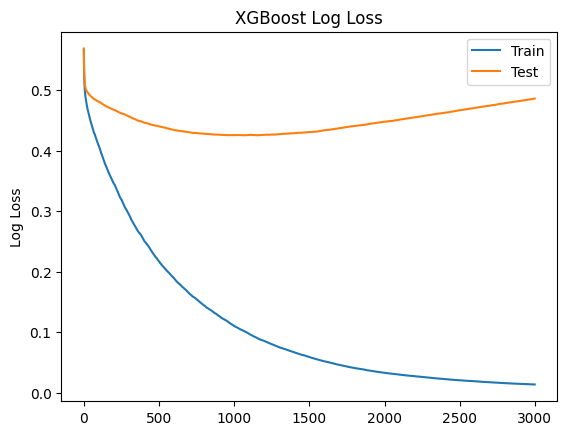

In [49]:
# model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

# import matplotlib.pyplot as plt
# results = x_clf.evals_result()
# epochs = len(results['validation_0']['logloss'])
# x_axis = range(0, epochs)
# # plot log loss
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
# ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
# ax.legend()
# plt.ylabel('Log Loss')
# plt.title('XGBoost Log Loss')
# plt.show()

##### Model is overfitting!

In [26]:
# all columns
columns = ['usefulCount', 'sentiment_score', 'sentiment_score_clean', 'word_count',
       'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'subj_count', 'obj_count',
       'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC',
       'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT',
       'QUANTITY', 'TIME', 'WORK_OF_ART', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19']
print(len(columns))

49


#### Feature Selection
Selecting Main Features of dataset

In [51]:
# from sklearn.feature_selection import SelectFromModel

# def feature_selection(classifier, data):
#     '''this function takes classifier and data as input and returns the columns/features need to be dropped'''
#     model = SelectFromModel(classifier,prefit=True)
#     X_new = model.transform(data)
#     print('Important features count from RF feature importance are:',X_new.shape)
    
#     idx = list(model.get_support())
#     print("idx: ",idx)
#     col= np.array(columns)
#     print("col: ",col)
#     imp_col = col[idx]
#     print("imp_col: ",imp_col)
#     drop_col = []
#     for i in columns:
#         if i not in imp_col:
#             drop_col.append(i)
#     print('Count of features to be dropped:',len(drop_col))
#     return drop_col

# drop_cols = feature_selection(rf_clf,X_tr_1)
# drop_cols

Important features count from RF feature importance are: (104218, 6)
idx:  [True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]
col:  ['usefulCount' 'sentiment_score' 'sentiment_score_clean' 'word_count'
 'unique_word_count' 'char_length' 'count_punctuations' 'stopword_count'
 'mean_word_len' 'subj_count' 'obj_count' 'CARDINAL' 'DATE' 'EVENT' 'FAC'
 'GPE' 'LANGUAGE' 'LAW' 'LOC' 'MONEY' 'NORP' 'ORDINAL' 'ORG' 'PERCENT'
 'PERSON' 'PRODUCT' 'QUANTITY' 'TIME' 'WORK_OF_ART' '0' '1' '2' '3' '4'
 '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19']
imp_col:  ['usefulCount' 'sentiment_score_clean' 'word_count' 'count_punctuations'
 '18' '19']
Count of features to be dropped: 43


['sentiment_score',
 'unique_word_count',
 'char_length',
 'stopword_count',
 'mean_word_len',
 'subj_count',
 'obj_count',
 'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17']

In [31]:
drop_cols =['sentiment_score',
 'unique_word_count',
 'char_length',
 'stopword_count',
 'mean_word_len',
 'subj_count',
 'obj_count',
 'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17']

In [ ]:
print(X_train.shape)
X_train.head()

In [ ]:
X_train = X_train.drop(drop_cols,axis=1)
X_test = X_test.drop(drop_cols,axis=1)
X_cv = X_cv.drop(drop_cols,axis=1)

print("After dropping the columns the new shapes are:")
print('Train data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('CV data size:',X_cv.shape)

In [34]:
X_train.columns

Index(['drugName', 'condition', 'usefulCount', 'cleaned_review',
       'sentiment_score_clean', 'year', 'word_count', 'count_punctuations',
       '18', '19'],
      dtype='object')

In [35]:
X_train.head()

,drugName,condition,usefulCount,cleaned_review,sentiment_score_clean,year,word_count,count_punctuations,18,19
19020,divalproex sodium,bipolar disorde,50,zombi gain much weight take lamict much better,0.7430,2014,8,4,0.001111,0.001111
6389,adalimumab,psoriasis,23,first time year abl comfort wear dark color sh...,0.6249,2009,27,13,0.000370,0.038644
200811,dabigatran,prevention of thromboembolism in atrial fibril...,53,take pradaxa month first two month realli thou...,-0.7351,2011,52,18,0.000200,0.000200
100582,mirena,birth control,20,mirena eight month never happier period four m...,-0.5962,2013,35,17,0.028414,0.000278
202645,alprostadil,erectile dysfunction,34,good luck wish could still get told avaial,0.8225,2008,8,5,0.001250,0.001250


In [56]:
# imp_cols = []
# for c in columns:
# 	if c not in drop_cols:
# 		imp_cols.append(c);
# imp_cols

['usefulCount',
 'sentiment_score_clean',
 'word_count',
 'count_punctuations',
 '18',
 '19']

In [36]:
# mine
imp_cols=['usefulCount',
 'sentiment_score_clean',
 'word_count',
 'count_punctuations',
 '18',
 '19']

In [58]:
# from ruthvik marshetty
# imp_columns = ['usefulCount','word_count', 'unique_word_count', 'char_length', 'count_punctuations',
#        'stopword_count', 'mean_word_len', 'TIME', 'WORK_OF_ART', '0', '1', '2',
#                '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '15', '16', '17', '18', '19']

In [37]:
# Normalizing the features after dropping the unimportant features 

normalizer = Normalizer()

X_train_num_2 = normalizer.fit_transform(X_train[imp_cols])
X_test_num_2 = normalizer.fit_transform(X_test[imp_cols])
X_cv_num_2 = normalizer.fit_transform(X_cv[imp_cols])

print("After vectorizations")
print(X_train_num_2.shape, y_train.shape)
print(X_test_num_2.shape, y_test.shape)
print(X_cv_num_2.shape, y_cv.shape)

After vectorizations
(104218, 6) (104218,)
(63807, 6) (63807,)
(44665, 6) (44665,)


### Set I -> All Extracted Features + Sentiment scores
#### After dropping unimportant features and Normalization

In [31]:
#concatenating all encoded features for set 1 

# from scipy.sparse import hstack
# X_tr_1 = np.concatenate((X_train_num_2,X_train_sent_score),axis=1)

# X_te_1 = np.concatenate((X_test_num_2,X_test_sent_score),axis=1)

# X_cv_1 = np.concatenate((X_cv_num_2,X_cv_sent_score),axis=1)

# print("Final Data matrix")
# print(X_tr_1.shape, y_train.shape)
# print(X_te_1.shape, y_test.shape)
# print(X_cv_1.shape, y_cv.shape)

Final Data matrix
(104218, 8) (104218,)
(63807, 8) (63807,)
(44665, 8) (44665,)


In [63]:
# x_cfl_1 = XGBClassifier()
# prams={
# 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
# 'n_estimators':[100,500,1000,2000,3000],
# 'max_depth':[3,5,7,10,30,50],
# 'colsample_bytree':[0.1,0.3,0.5,1],
# 'subsample':[0.1,0.3,0.5,1]
# }
# x_random_cfl_1 = RandomizedSearchCV(x_cfl_1,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
# x_random_cfl_1.fit(X_tr_1,y_train)

# print(x_random_cfl_1.best_params_)
# print(x_random_cfl_1.best_score_)

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.5}
0.8373625788288188


In [64]:
# Here early stopping parameter has been used as in the above xgboost model there is an overfitting 
# occured with same 3000 estimators

# eval_set = [(X_tr_1, y_train), (X_cv_1, y_cv)]

# x_cfl_1=XGBClassifier(n_estimators=3000,subsample=1,max_depth=10,learning_rate=0.2,colsample_bytree=0.5,nthread=-1,objective='binary:logistic', random_state=0)

# x_cfl_1.fit(X_tr_1,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=30)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [65]:

# x_sig_clf_1 = CalibratedClassifierCV(x_cfl_1, method="sigmoid")
# x_sig_clf_1.fit(X_tr_1, y_train)
    
# model_metrics(x_sig_clf_1,X_tr_1,X_te_1,X_cv_1)

**LogLoss**
The train log loss is: 0.2091557703623152
The cross validation log loss is: 0.43687747622031586
The test log loss is: 0.4377849922206692
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.9990308775835268
The cross validation Accuracy is: 0.8280532855703571
The test Accuracy is: 0.8271506261068535
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.9993093214253964
The cross validation F1 score is: 0.8828268033687294
The test F1 score is: 0.8822002670226969
--------------------------------------------------


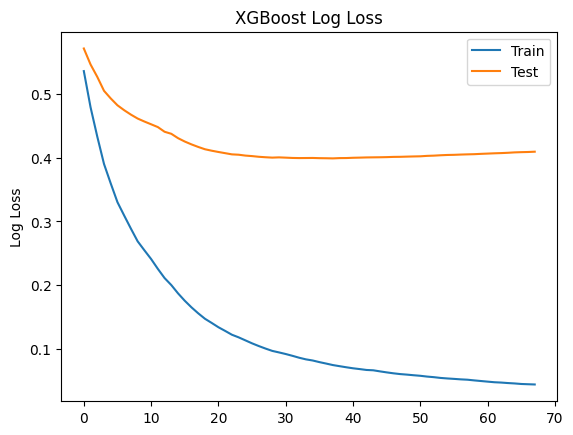

In [66]:
# results = x_cfl_1.evals_result()
# epochs = len(results['validation_0']['logloss'])
# x_axis = range(0, epochs)
# # plot log loss
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
# ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
# ax.legend()
# plt.ylabel('Log Loss')
# plt.title('XGBoost Log Loss')
# plt.show()

In [67]:
# import joblib
# print('Extracted features Model saved..')
# joblib.dump(x_sig_clf_1, '../models/set1_model.pkl')

Extracted features Model saved..


['../models/set1_model.pkl']

### Set II -> All Extracted Features + Sentiment scores + Reviews Bow (uni-gram) vectors

#### Set II Data

In [38]:
#concatenating all encoded features for set 2

from scipy.sparse import hstack
X_tr_2 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_bow_1)).tocsr()

X_te_2 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_bow_1)).tocsr()

X_cv_2 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_bow_1)).tocsr()

print("Final Data matrix")
print(X_tr_2.shape, y_train.shape)
print(X_te_2.shape, y_test.shape)
print(X_cv_2.shape, y_cv.shape)

Final Data matrix
(104218, 7337) (104218,)
(63807, 7337) (63807,)
(44665, 7337) (44665,)


#### Random Forest

In [69]:
# param = {'n_estimators':[100,500,1000,2000,3000]}

# rf_clf =RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=8)

# random_rf = RandomizedSearchCV(rf_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
# random_rf.fit(X_tr_2,y_train)

# print(random_rf.best_params_)

In [70]:
# rf_clf = RandomForestClassifier(n_estimators=3000 ,random_state=42,n_jobs=-1,max_depth=8)
# rf_clf.fit(X_tr_2,y_train)
# sig_clf = CalibratedClassifierCV(rf_clf, method="sigmoid")
# sig_clf.fit(X_tr_2, y_train)

    
# model_metrics(sig_clf,X_tr_2,X_te_2,X_cv_2)

**LogLoss**
The train log loss is: 0.4442215345162851
The cross validation log loss is: 0.4588691754978668
The test log loss is: 0.45940458374407483
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.790544819512944
The cross validation Accuracy is: 0.7806336057315572
The test Accuracy is: 0.7795539674330403
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.858884600714983
The cross validation F1 score is: 0.8522795802677602
The test F1 score is: 0.8513704854286861
--------------------------------------------------


#### XGBoost

##### XGBoost without hyperparameter tuning

In [71]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

eval_set = [(X_tr_2, y_train), (X_cv_2, y_cv)]

x_clf =XGBClassifier(
	n_estimators=3000,
	nthread=-1,
	objective='binary:logistic',
	random_state=0)

x_clf.fit(X_tr_2,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0)


sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_tr_2, y_train)

    
model_metrics(sig_clf,X_tr_2,X_te_2,X_cv_2)

results = x_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


KeyboardInterrupt: 

##### XGBoost with hyperparameter tuning

In [ ]:
# x_cfl_2 = XGBClassifier()
# prams={
# 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
# 'n_estimators':[100,500,1000,2000,3000],
# 'max_depth':[3,5,7,10],
# 'colsample_bytree':[0.1,0.3,0.5,1],
# 'subsample':[0.1,0.3,0.5,1]
# }
# x_random_cfl_2 = RandomizedSearchCV(x_cfl_2,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
# x_random_cfl_2.fit(X_tr_2,y_train)

# print(x_random_cfl_2.best_params_)

In [34]:
eval_set = [(X_tr_2, y_train), (X_cv_2, y_cv)]

x_cfl_2= XGBClassifier(
	n_estimators=1000,
	subsample=1,
	max_depth=10,
	learning_rate=0.1,
	colsample_bytree=0.1,
	nthread=-1,
	objective='binary:logistic', 
	random_state=0)

x_cfl_2.fit(X_tr_2,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=20)

In [ ]:
x_sig_clf_2 = CalibratedClassifierCV(x_cfl_2, method="sigmoid")
x_sig_clf_2.fit(X_tr_2, y_train)

model_metrics(x_sig_clf_2,X_tr_2,X_te_2,X_cv_2)

In [ ]:

results = x_cfl_2.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [ ]:
import joblib
print('BoW Model saved..')
joblib.dump(x_sig_clf_2, '../models/set2_model.pkl')

### Set III -> All Extracted Features + Sentiment scores + Reviews TFI-DF (uni-gram) vectors

In [39]:
from scipy.sparse import hstack
X_tr_3 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_tfidf_1)).tocsr()

X_te_3 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_tfidf_1)).tocsr()

X_cv_3 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_tfidf_1)).tocsr()

print("Final Data matrix")
print(X_te_3.shape, y_test.shape)
print(X_cv_3.shape, y_cv.shape)
print(X_tr_3.shape, y_train.shape)

Final Data matrix
(63807, 7337) (63807,)
(44665, 7337) (44665,)
(104218, 7337) (104218,)


#### XGBoost Classifier

#### XGBoost with hyperparameter tuning

In [ ]:
# x_cfl_3 = XGBClassifier()
# prams={
# 'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
# 'n_estimators':[100,500,1000,2000,3000],
# 'max_depth':[3,5,7,10],
# 'colsample_bytree':[0.1,0.3,0.5,1],
# 'subsample':[0.1,0.3,0.5,1]
# }
# x_random_cfl_3 = RandomizedSearchCV(x_cfl_3,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
# x_random_cfl_3.fit(X_tr_3,y_train)

# print(x_random_cfl_3.best_params_)

In [ ]:
eval_set = [(X_tr_3, y_train), (X_cv_3, y_cv)]

x_cfl_3= XGBClassifier(
	n_estimators=3000,
	subsample=0.3,
	max_depth=7,
	learning_rate=0.05,
	colsample_bytree=1,
	nthread=-1,
	objective='binary:logistic', 
	random_state=0)

x_cfl_3.fit(X_tr_3,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=20)

In [ ]:
x_sig_clf_3 = CalibratedClassifierCV(x_cfl_2, method="sigmoid")
x_sig_clf_3.fit(X_tr_3, y_train)

In [ ]:
model_metrics(x_sig_clf_3,X_tr_3,X_te_3,X_cv_3)

results = x_cfl_3.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


In [ ]:
import joblib
print('tfidf Model saved..')
joblib.dump(x_sig_clf_3, '../models/set3_model.pkl')

## Model Evaluation Metrics summary

In [ ]:
from prettytable import PrettyTable

model_1 = joblib.load('../models/set1_model.pkl')
model_2 = joblib.load('../models/set1_model.pkl')
model_3 = joblib.load('../models/set3_model.pkl')


In [ ]:
t = PrettyTable()

t.field_names = ['Models','F1 Score(Train Data)','F1 Score(Test Data)']

t.add_row([
		'XGBOOST+BoW(1gram)',
		f1_score(y_train,model_2.predict(X_tr_2)),
		f1_score(y_test,model_2.predict(X_te_2))
		])

t.add_row([
	'XGBOOST+TF-IDF(1gram)',
	f1_score(y_train,model_3.predict(X_tr_3)),
	f1_score(y_test,model_3.predict(X_te_3))
	])

In [ ]:
def userful_count(data,feature):
    '''this function takes dataframe and feature as input and normalize the given feature'''
    
    max_value = data[feature].max()
    min_value = data[feature].min()
    data[feature] = (data[feature] - min_value) / (max_value - min_value)
    return data 

In [ ]:
# Each model predictions are stored as one column and recommendation score is calculated by adding predictions 
# of 5 models multiplied by its normalized useful count

X_test['model2'] = model_2.predict(X_te_2)
X_test['model3'] = model_3.predict(X_te_3)

X_test =  userful_count(X_test,'usefulCount')
X_test['usefulCount'] = X_test['usefulCount']/X_test['user_size']

X_test['rec_score'] = (X_test['model2']+X_test['model3']) * X_test['usefulCount']
X_test.head()
print(X_test.shape)

In [ ]:
X_test.to_csv('../csv/validation_data.csv',index=False)

### Grouping the datafrom with respect to condition and drugname. 

In [ ]:
df = X_test.groupby(['condition','drugName']).agg({'rec_score':['sum']})
print(df.shape)
df

In [ ]:
# testing prediction for single case
X_test[X_test['condition']=='zen shoulde'].sort_values(by=['rec_score'],ascending=False)

# Recommendation
This function takes the given condition as input and returns the top drugs based on highest rec scores

In [ ]:

def recommend(condition):
	data = pd.read_csv("../csv/validation_data.csv")
	data = data[data["condition"]==condition]
	drug_cnt = data['drugName'].nunique()
	data['rec_score'] = data['rec_score']/drug_cnt
	grp_drug = data.groupby(['drugName']).agg({'rec_score':['sum']})
	grp_drug = grp_drug[('rec_score','sum')].sort_values(ascending=False)
	med_score = dict(grp_drug)

	if len(med_score)>5:
		print('Top 5 Drugs for the condition : {0}'.format(condition.upper()))
		for i in list(med_score.keys())[0:5]:
			print('->',i)
	else:
		print('Top  Drugs for the condition : {0}'.format(condition.upper()))
		for i in med_score.keys():
			print('->',i)


In [ ]:
recommend('birth control')